## Lesson 5: Futures Analysis
Revisiting our strategy, we can use the tools we have covered so far in order to compare our crude oil future to a future in the same supply chain, RBOB Gasoline (XB). The idea is that because Gasoline is derived from oil, the changes in contract price for one future should be reflected on the other.

Let's import `continuous_future` and `history`, define continuous futures for both assets and get pricing data for both.

In [1]:
from quantopian.research.experimental import continuous_future, history

cl_future = continuous_future('CL')
xb_future = continuous_future('XB')

cl_price = history(cl_future, start_date='2014-01-01', end_date='2015-01-01', fields='price')
xb_price = history(xb_future, start_date='2014-01-01', end_date='2015-01-01', fields='price')

Now, contracts for these futures have different multipliers. Light Sweet Crude Oil has a multiplier of 1,000 barrels per contract, while RBOB Gasoline Futures has a multiplier of 42,000 gallons per contract. In order for the prices to have the same scale, we need to adjust one of them by the ratio of their multipliers. For example, we can adjust XB's price by multiplying it by 42.

With that in mind, let's plot the price history for both continuous futures:

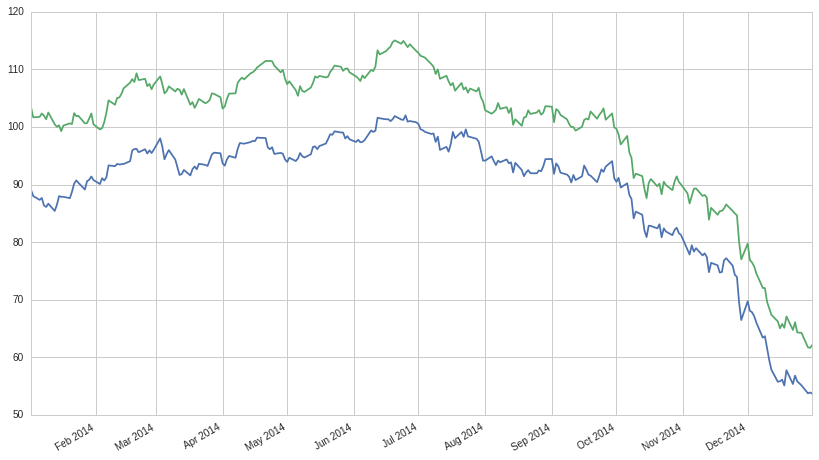

In [2]:
cl_price.plot()
xb_price.multiply(42).plot();

We can see in our plot that both prices follow a similar trend, so our strategy probably has some validity based on historical data.

As it turns out, this trend can be explained by a statistical property called [Cointegration](https://en.wikipedia.org/wiki/Cointegration). Essentially, if two time series are cointegrated, there is an equilibrium relationship between them in the long run, even if they seem to diverge substantially from that equilibrium in the short term. [Pairs Trading](https://en.wikipedia.org/wiki/Pairs_trade) strategies take advantage of this trend by shorting one future in the pair and going long on the other as the spread increases or decreases, with the expectation that the spread will return to its state of equilibrium.

We can do a quick test for cointegration using the [coint](http://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.coint.html#statsmodels.tsa.stattools.coint) function from Python's [statsmodels](http://www.statsmodels.org/stable/) library. If the second value of coint's output (pvalue) is small, this means the input time series are cointegrated.

In [3]:
import statsmodels.api as sm
import statsmodels.tsa as tsa

tsa.stattools.coint(cl_price, xb_price)[1]

0.012039098535189771

Cointegration is covered in depth in our Integration, Cointegration, and Stationarity lecture. You can find it in our [Lecture Series](https://quanto-playground.herokuapp.com/lectures) page.

Now that we have some evidence that our idea might be valid, let's build an algorithm that takes advantage of the relationship we discovered between crude oil and gasoline. The rest of the tutorial will cover the algorithm API and the Interactive Development Environment (IDE). We will start by looking at the core functions available in the platform, and backtesting a simply example.